In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('exports/comments_aggregated_20250629_151921.csv')

df.head()

,observation_time,device,source,updated_at,positive_comment_number,neutral_comment_number,negative_comment_number,total_comments,sentiment_polarity,positive_comment_perc,neutral_comment_perc,negative_comment_perc
0,2025-06-29 13:00:00,smartphone,Email,2025-06-29 12:41:01,1,2,1,4,0.050000,0.25,0.50,0.25
1,2025-06-29 13:00:00,smartphone,Instagram,2025-06-29 12:41:01,2,1,0,3,0.263333,0.67,0.33,0.00
2,2025-06-29 13:00:00,smartphone,TikTok,2025-06-29 12:41:01,3,2,1,6,0.153889,0.50,0.33,0.17
3,2025-06-29 13:00:00,smartphone,Twitter,2025-06-29 12:41:01,2,0,2,4,-0.017882,0.50,0.00,0.50
4,2025-06-29 13:00:00,smartphone,Website,2025-06-29 12:41:01,2,0,1,3,0.066667,0.67,0.00,0.33


In [39]:
positive_count = df['positive_comment_number'].sum()
neutral_count = df['neutral_comment_number'].sum()
negative_count = df['negative_comment_number'].sum()

In [41]:
total_count = df['total_comments'].sum()
positive_perc = df['positive_comment_perc'].mean()
neutral_perc = df['neutral_comment_perc'].mean()
negative_perc = df['negative_comment_perc'].mean()

print(f"Total count: {total_count}")
print(f"Positive perc: {positive_perc}")
print(f"Negative perc: {negative_perc}")
print(f"Neutral perc: {neutral_perc}")

Total count: 140
Positive perc: 0.39987654320987653
Negative perc: 0.22444444444444445
Neutral perc: 0.3756790123456791


In [40]:
positive_count/ total_count

np.float64(0.4142857142857143)

Text(0.5, 1.0, 'Sentiment by % of comments')

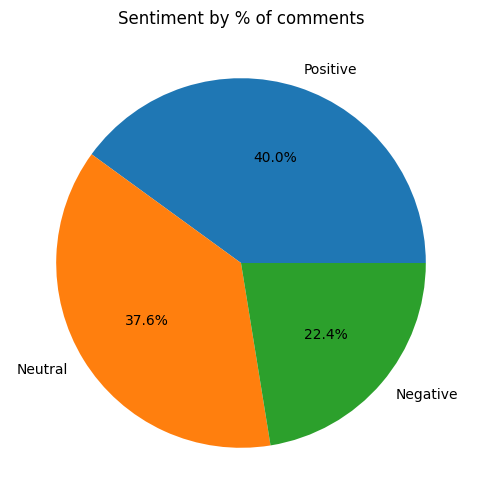

In [28]:
fig1, ax1 = plt.subplots(figsize=(10, 6))

plt.pie([positive_perc, neutral_perc, negative_perc], labels=['Positive', 'Neutral', 'Negative'], autopct='%1.1f%%')
ax1.set_title('Sentiment by % of comments')

In [43]:
# df.head()

sentiment_polarity = df.groupby(['device', 'observation_time'])['sentiment_polarity'].mean().reset_index()

sentiment_polarity


,device,observation_time,sentiment_polarity
0,smartphone,2025-06-29 13:00:00,0.119334
1,smartphone,2025-06-29 13:16:00,0.545000
2,smartphone,2025-06-29 13:17:00,-0.200000
3,smartphone,2025-06-29 13:18:00,0.088889
4,smartphone,2025-06-29 13:19:00,0.166667
5,smartphone,2025-06-29 13:20:00,0.200000
6,smartphone,2025-06-29 13:21:00,-0.500000
7,smartphone,2025-06-29 13:22:00,0.250000
8,smartphone,2025-06-29 13:23:00,0.011736
9,smartphone,2025-06-29 13:24:00,0.400000


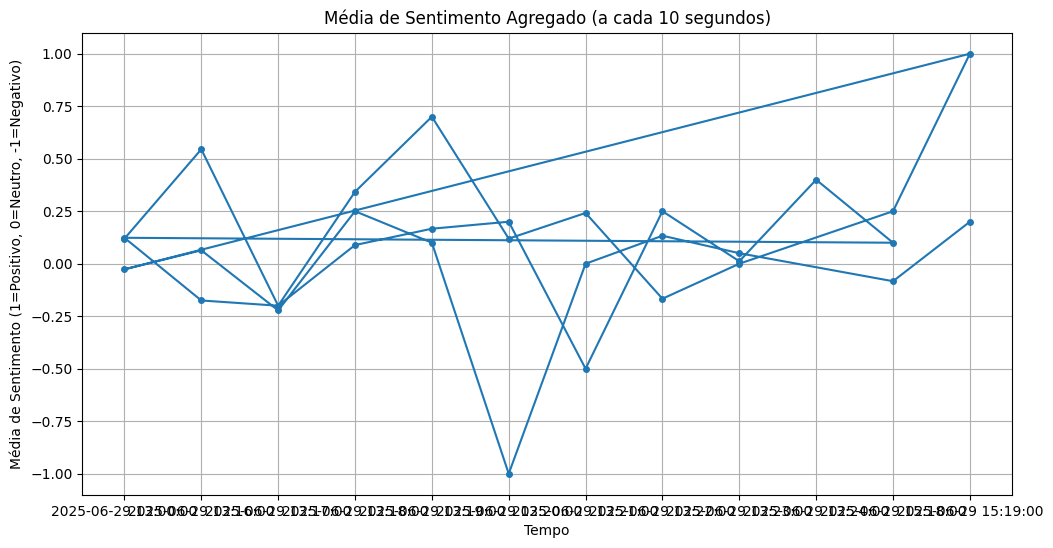

In [37]:
fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.plot(sentiment_polarity['observation_time'], sentiment_polarity['sentiment_polarity'], marker='o', linestyle='-', markersize=4)
ax2.set_title('Média de Sentimento Agregado (a cada 10 segundos)')
ax2.set_xlabel('Tempo')
ax2.set_ylabel('Média de Sentimento (1=Positivo, 0=Neutro, -1=Negativo)')
ax2.grid(True)

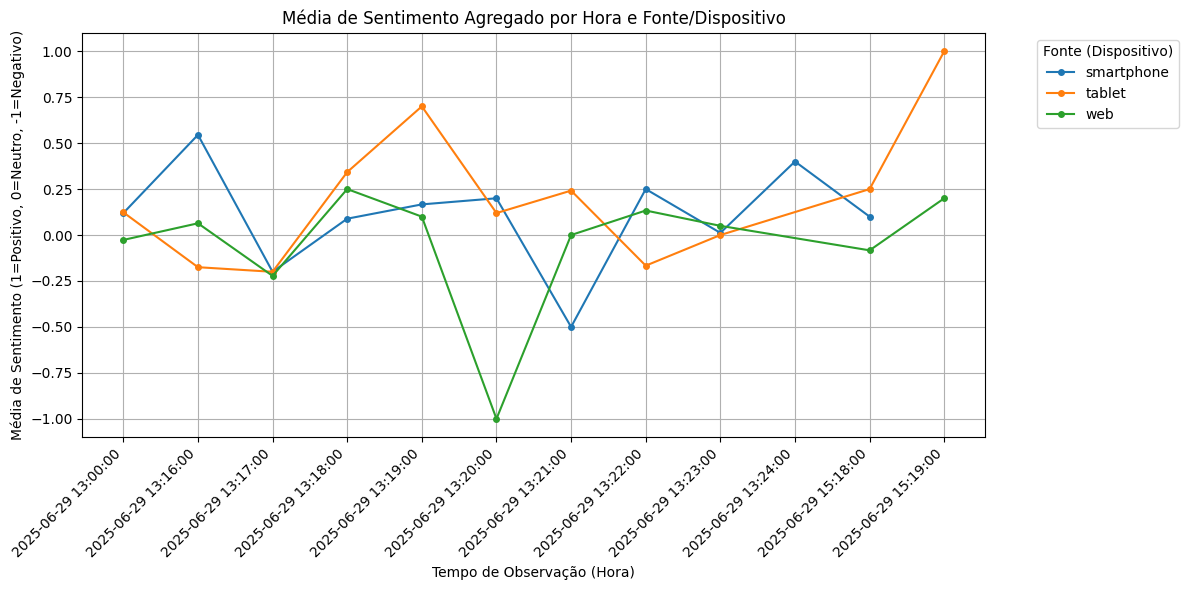

In [38]:
fig2, ax2 = plt.subplots(figsize=(12, 6))

for source_val, group_df in sentiment_polarity.groupby('device'):
    # Ordena os dados dentro de cada grupo por tempo para garantir que a linha seja contínua
    group_df_sorted = group_df.sort_values('observation_time')
    ax2.plot(group_df_sorted['observation_time'], group_df_sorted['sentiment_polarity'],
             marker='o', linestyle='-', markersize=4,
             label=f'{source_val}') # Rótulo da legenda

ax2.set_title('Média de Sentimento Agregado por Hora e Fonte/Dispositivo')
ax2.set_xlabel('Tempo de Observação (Hora)')
ax2.set_ylabel('Média de Sentimento (1=Positivo, 0=Neutro, -1=Negativo)')
ax2.grid(True)
ax2.legend(title='Fonte (Dispositivo)', bbox_to_anchor=(1.05, 1), loc='upper left') # Legenda fora do gráfico
plt.xticks(rotation=45, ha='right') # Rotação para o eixo X
plt.tight_layout() # Ajusta o layout para evitar sobreposição

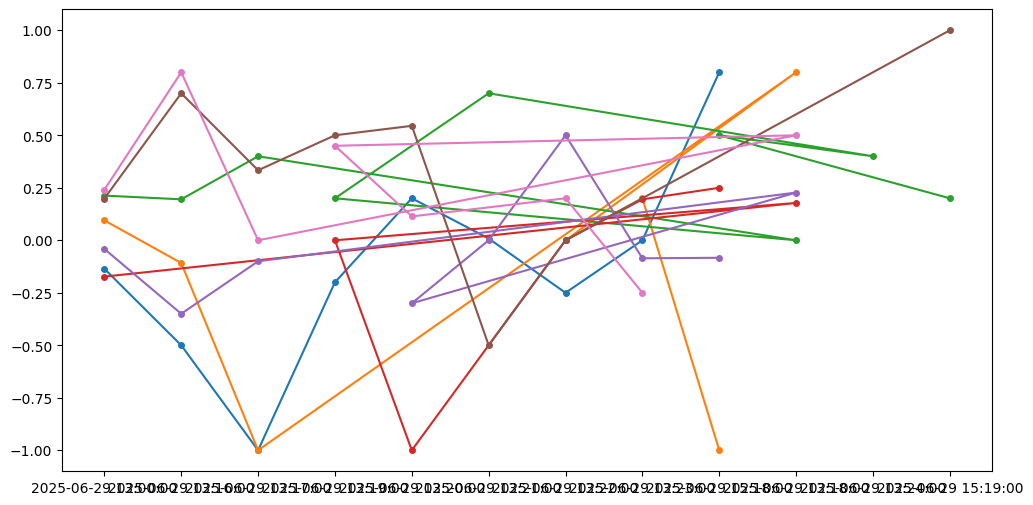

In [31]:
fig2, ax2 = plt.subplots(figsize=(12, 6))

for source_name, group_df in sentiment_polarity.groupby('source'):
    ax2.plot(group_df['observation_time'], group_df['sentiment_polarity'], marker='o', linestyle='-', markersize=4)

    # ax2.plot(group_df['observation_time'], group_df['sentiment_polarity'],
    #          marker='o', linestyle='-', markersize=4, label=source_name)